In [5]:
%run "Scripts/dataprep.py"

Directory C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\Originais\768 loaded successfully.


In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
sys.path.append('Scripts')

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils import path
from sklearn import preprocessing
import os

from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField

In [3]:
def read_data(dataframe, ind):
    return pd.read_csv(dataframe.loc[ind]['path'], index_col = 0, names = ['series'], dtype = float).values

In [4]:
dataType = '512'
#dataPath = path('/home/roboto/Documents/GitHub/ICDeepLearning/Data/Dados_BCI_Combinados')
dataPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\Dados_BCI_Combinados\\'+dataType)
data = pd.read_csv('SSVEPDatasetCombined.csv')
#figPath = path('/home/roboto/Documents/GitHub/ICDeepLearning/Data/GAF_Combinados')
figPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\GAF_Combinados\\'+dataType)

Directory C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\Dados_BCI_Combinados\512 loaded successfully.
Directory C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\GAF_Combinados\512 loaded successfully.


In [44]:
dataType = 'shifted'
#dataPath = path('/home/roboto/Documents/GitHub/ICDeepLearning/Data/Dados_BCI_CombinadosPCA/'+dataType)
dataPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\Dados_BCI_CombinadosPCA\\'+dataType)
data = pd.read_csv('SSVEPDatasetPCA.csv')
#figPath = path('/home/roboto/Documents/GitHub/ICDeepLearning/Data/GAF_PCA/'+dataType)
figPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\GAF_PCA\\'+dataType)

Directory C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\Dados_BCI_CombinadosPCA\shifted loaded successfully.
Directory C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\GAF_PCA\shifted loaded successfully.


Gramian Angular Field Script

MemoryError: Unable to allocate 12.5 MiB for an array with shape (1812, 1812, 4) and data type uint8

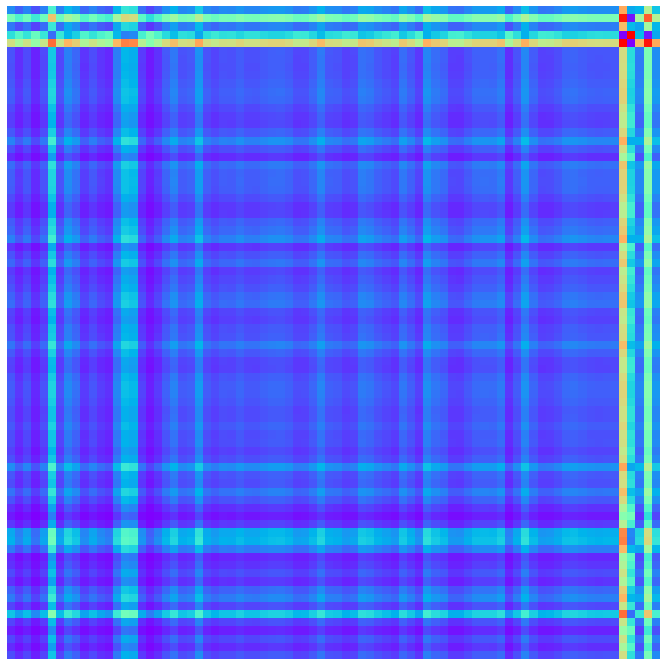

In [5]:
gasf = GramianAngularField(image_size = 80, method = 'summation')

# for i in range(len(data)):
for i in range(len(data)):
#     sample = read_data(data, i).T
    sample = np.loadtxt(data.loc[i]['path']).reshape(1, -1)
    if sample[0][1] != 0:
        X = gasf.fit_transform(sample)
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 12))
        plt.axis('off')
        im = ax.imshow(X[0], cmap = 'rainbow', origin = 'lower')
        state = str(data.loc[i]['state'])+"\\"
        subject = str(data.loc[i]['path'][-21])
        fig.savefig(figPath+'\\'+state+subject+'_'+data.loc[i]['path'][-19:][:-4]+".png", dpi = 200, bbox_inches = 'tight')
        #fig.savefig(figPath/state+subject+'_'+data.loc[i]['path'][2:][:-4]+".png", dpi = 200, bbox_inches = 'tight')
        plt.close()

***

In [70]:
gasf = GramianAngularField(image_size = 80, method = 'summation')
X_gasf = gasf.fit_transform(sample)

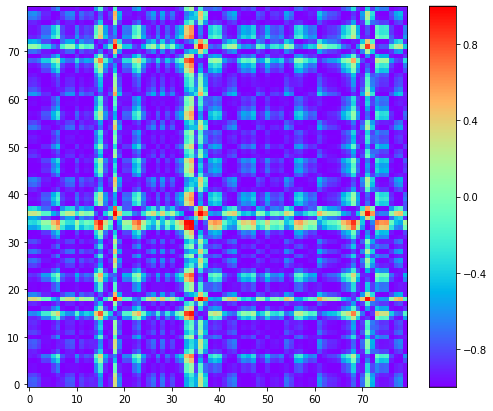

In [71]:
fig = plt.figure(figsize = (12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_gasf[0], cmap = 'rainbow', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()